# AI Art Trends Data Analysis

In this part of the analysis, I will use two complementary datasets to perform exploratory data analysis (EDA) and conduct hypothesis tests aimed at understanding the factors that influence the popularity of AI-generated artworks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1 = pd.read_csv("ai_generated_art_trends_2024.csv")
df1 = df1.iloc[:, :-2] # delete the useless columns
df1.head()

,Artwork_ID,Artist_Name,Art_Style,Creation_Date,Medium,Tools_Used,Popularity_Score,Region,Art_Genre,Platform
0,ART-00001,DALL-E,Conceptual,2023-03-11,Collage,GANPaint,1604.25,South America,Urban,Instagram
1,ART-00002,AbstractoBot,Futurism,2022-11-27,Oil Paint,MidJourney,4162.12,North America,Abstract,Dribbble
2,ART-00003,Vincent,Futurism,2024-03-13,Charcoal,GANPaint,2989.38,Europe,Mythology,Reddit
3,ART-00004,ArtBreeder,Impressionism,2022-09-12,Pencil Sketch,ArtBreeder,2985.97,Europe,Still Life,Tumblr
4,ART-00005,DALL-E,Surrealism,2022-12-05,Collage,DeepDream,2035.18,Asia,Conceptual,DeviantArt


In [3]:
df1["Creation_Date"] = pd.to_datetime(df1["Creation_Date"])
df1["Year"] = df1["Creation_Date"].dt.year
df1["Month"] = df1["Creation_Date"].dt.month

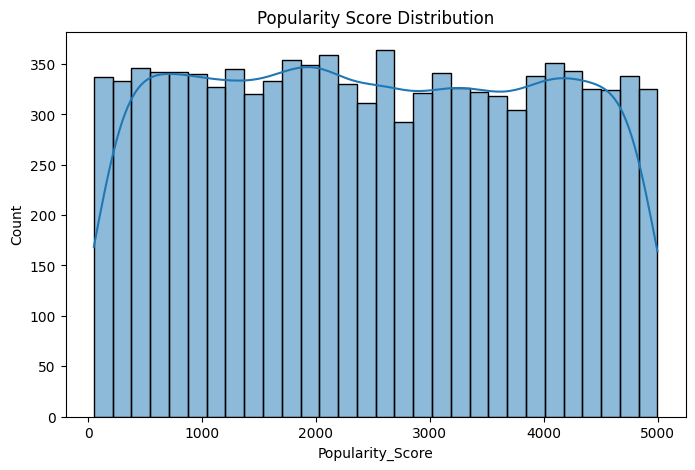

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df1["Popularity_Score"], kde=True, bins=30)
plt.title("Popularity Score Distribution")
plt.show()

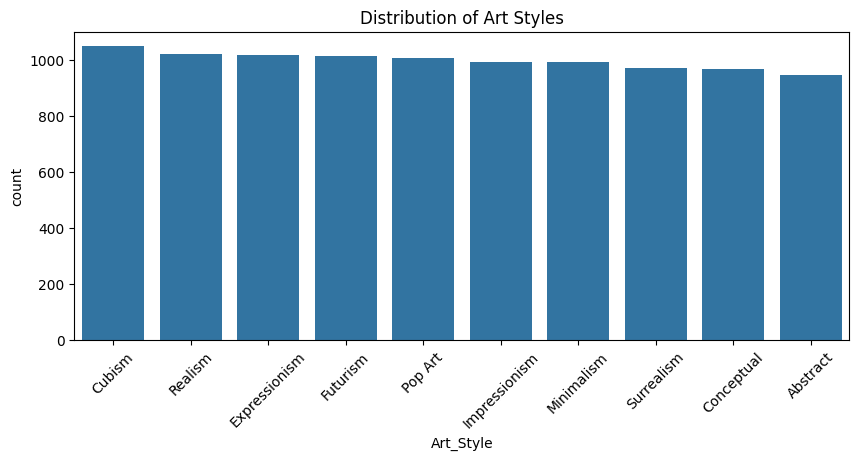

In [5]:
plt.figure(figsize=(10,4))
sns.countplot(data=df1, x="Art_Style", order=df1["Art_Style"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Art Styles")
plt.show()

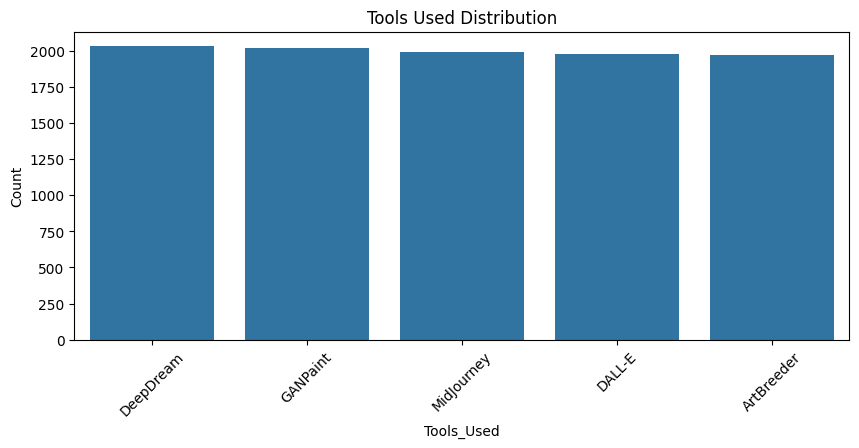

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(data=df1, x="Tools_Used", order=df1["Tools_Used"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Tools Used Distribution")
plt.ylabel("Count")
plt.show()

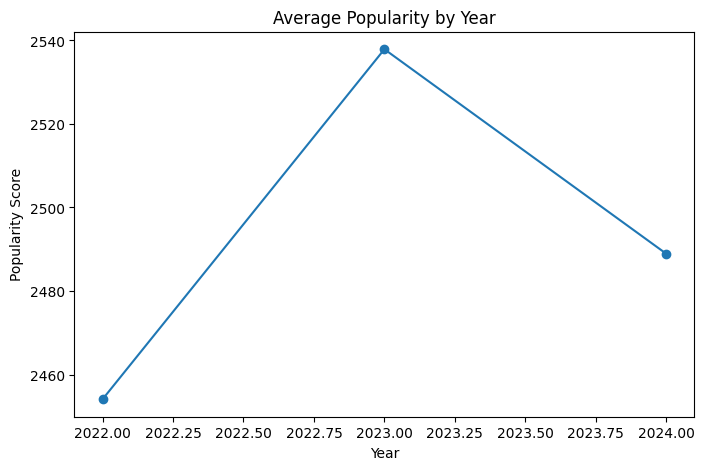

In [7]:
plt.figure(figsize=(8,5))
df1.groupby("Year")["Popularity_Score"].mean().plot(marker='o')
plt.title("Average Popularity by Year")
plt.xlabel("Year")
plt.ylabel("Popularity Score")
plt.show()

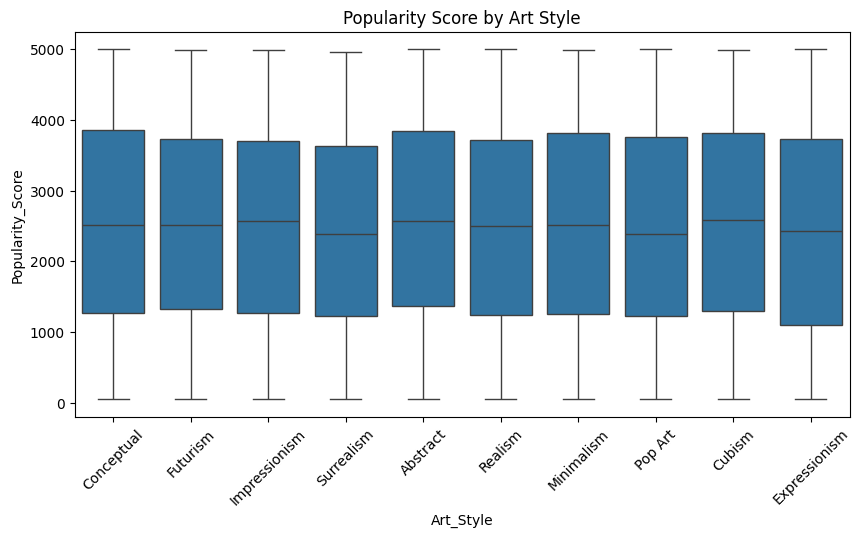

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1, x="Art_Style", y="Popularity_Score")
plt.xticks(rotation=45)
plt.title("Popularity Score by Art Style")
plt.show()

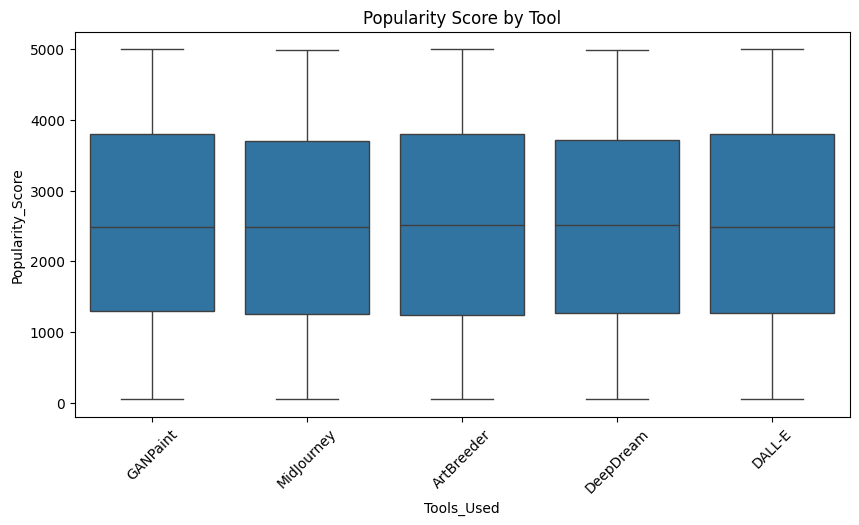

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1, x="Tools_Used", y="Popularity_Score")
plt.xticks(rotation=45)
plt.title("Popularity Score by Tool")
plt.show()

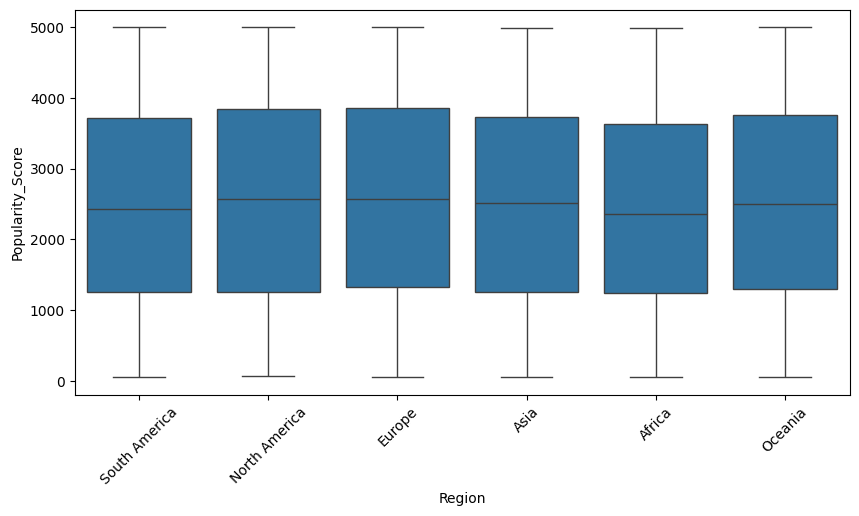

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1, x="Region", y="Popularity_Score")
plt.xticks(rotation=45)
plt.show()

In [11]:
df_corr = df1.copy()

df_corr = pd.get_dummies(df_corr, columns=["Art_Style", "Tools_Used", "Region", "Art_Genre", "Platform"], drop_first=True)

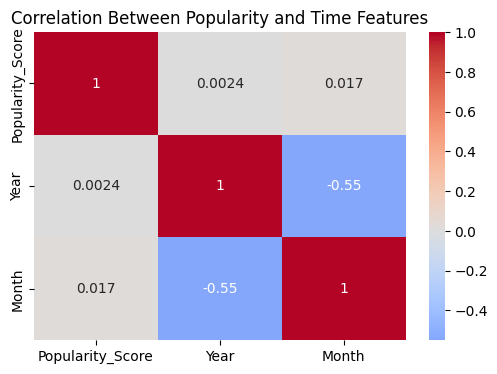

In [22]:
# Select only meaningful numeric features
corr_features = [
    "Popularity_Score",
    "Year",
    "Month"
]

corr_matrix = df_corr[corr_features].corr()

plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Between Popularity and Time Features")
plt.show()

The correlation analysis indicates that popularity has almost no linear relationship with either year or month.  
This suggests that AI-generated artwork popularity does not follow a clear temporal or seasonal trend.  
The negative correlation between year and month reflects the data distribution rather than an effect on popularity.

### EDA outputs for dataset 1 summary:

In [13]:
print("Most common style:", df1['Art_Style'].mode()[0])
print("Most common tool:", df1['Tools_Used'].mode()[0])
print("Most common region:", df1['Region'].mode()[0])

print("Average popularity score:", df1["Popularity_Score"].mean())
print("Highest popularity score:", df1["Popularity_Score"].max())

Most common style: Cubism
Most common tool: DeepDream
Most common region: South America
Average popularity score: 2508.1907380000002
Highest popularity score: 4999.62


### Hypothesis Testing

In [14]:
df1["Creation_Date"] = pd.to_datetime(df1["Creation_Date"])
df1["Year"] = df1["Creation_Date"].dt.year

before_2023 = df1[df1["Year"] <= 2022]["Popularity_Score"]
after_2023 = df1[df1["Year"] >= 2023]["Popularity_Score"]

print("Before 2023 mean:", before_2023.mean())
print("After 2023 mean:", after_2023.mean())

Before 2023 mean: 2454.0940522063393
After 2023 mean: 2518.563943510904


In [15]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(before_2023, after_2023, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if (p_value < 0.05):
    print("There is a statistically significant increase in artwork popularity after 2022 (p < 0.05).")
else:
    print("The difference is not statistically significant (p ≥ 0.05).")

T-statistic: -1.6533438971303638
P-value: 0.09839947410643335
The difference is not statistically significant (p ≥ 0.05).


### H1 Result — Popularity Trend Over Time
A Welch's t-test was conducted to compare popularity scores before and after 2022.
Although the mean popularity slightly increased in recent years, the difference was not statistically significant (p ≥ 0.05).
Therefore, we fail to reject the null hypothesis.
This indicates that the dataset does not provide sufficient evidence that AI-generated artwork popularity has significantly increased after 2022.

In [16]:
from scipy.stats import f_oneway

groups = df1.groupby("Tools_Used")["Popularity_Score"].apply(list)

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if (p_value < 0.05):
    print("There is a statistically significant difference between tools used and popularity. (p < 0.05).")
else:
    print("The difference is not statistically significant (p ≥ 0.05).")

F-statistic: 0.10504852746692621
P-value: 0.9807875864162311
The difference is not statistically significant (p ≥ 0.05).


### H2 Result - Tools effect on Popularity
A one-way ANOVA test was used to examine whether different AI tools (MidJourney, GANPaint, ArtBreeder, DeepDream) produce significantly different popularity outcomes.
The results show no statistically significant difference among tools (p ≥ 0.05).
Thus, the null hypothesis cannot be rejected.
This suggests that in this dataset, tool choice alone does not strongly determine engagement or popularity of AI-generated artworks.

In [17]:
df2 = pd.read_csv("AI_Generated_Art_Popularity.csv")
df2.head()

,Artwork_ID,Platform,Style,Creator_Type,Views,Likes,Shares,Comments,Price (USD),Engagement_Score
0,ART_1,Foundation,Abstract,Hybrid,475256,8820,5333,16518,3695.97,0.13
1,ART_2,Foundation,Pixel Art,Hybrid,495947,33677,695,7780,78.19,0.21
2,ART_3,SuperRare,Abstract,Individual,358957,69803,39782,18294,631.75,0.45
3,ART_4,Opensea,Minimalist,Individual,388479,44801,11225,19008,3156.75,0.30
4,ART_5,SuperRare,Surreal,AI Model,129250,94963,31021,19210,4133.10,0.73


In [18]:
hybrid = df2[df2["Creator_Type"] == "Hybrid"]["Likes"]
ai_model = df2[df2["Creator_Type"] == "AI Model"]["Likes"]
individual = df2[df2["Creator_Type"] == "Individual"]["Likes"]

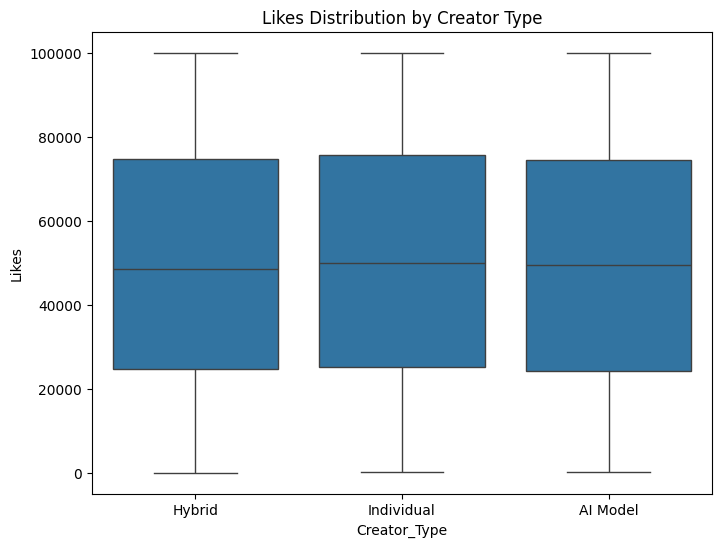

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df2, x="Creator_Type", y="Likes")
plt.title("Likes Distribution by Creator Type")
plt.show()

In [20]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(hybrid, ai_model, individual)
print("F-statistic:", f_stat)
print("P-value:", p_val)

if (p_val < 0.05):
    print("There is a statistically significant difference between creator type and popularity. (p < 0.05).")
else:
    print("The difference is not statistically significant (p ≥ 0.05).")

F-statistic: 0.36358693124572317
P-value: 0.6951966812503212
The difference is not statistically significant (p ≥ 0.05).


### H3 Result — Creator Type vs Popularity
An ANOVA test was conducted to examine whether the creator type
(Hybrid, AI Model, Individual) has a significant effect on Likes.
The test returned a non-significant result (p = 0.69), meaning that
we fail to reject the null hypothesis.
This indicates that the popularity of AI-generated artworks in this dataset
cannot be explained by creator type alone, and engagement levels are likely
influenced by other factors.
Although exploratory plots show minor differences in mean likes, these
differences are not statistically significant.

In [21]:
f_stat, p_val = f_oneway(*groups)
print("F-statistic:", f_stat)
print("P-value:", p_val)

if (p_val < 0.05):
    print("There is a statistically significant difference in popularity across art styles (p < 0.05).")
else:
    print("The difference is not statistically significant (p ≥ 0.05).")

F-statistic: 0.10504852746692621
P-value: 0.9807875864162311
The difference is not statistically significant (p ≥ 0.05).


### H4 Result - Art Style vs. Popularity

Based on the available dataset, there is no statistically significant evidence that artworks of different styles receive different popularity scores. Although minor variations in mean popularity exist across styles in the exploratory plots, these differences are not strong enough to be statistically confirmed.

## Conclusion
While statistical significance was not reached, exploratory plots still show visible differences in mean popularity across tools and styles.
These patterns may require a larger dataset or additional variables to detect statistically confirmed effects.